In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re


In [2]:
df = pd.read_csv('dialect_with_text.csv')
df.head()

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


## EDA

In [3]:
len(df['dialect'].unique())

18

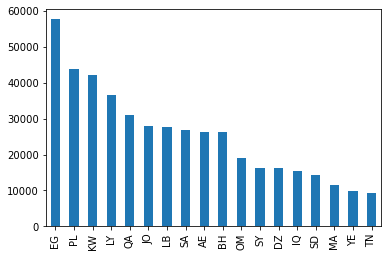

In [4]:
df['dialect'].value_counts().plot.bar()
plt.show()

we can clearly see than the data is imbalanced

## Data Pre-processing

In [5]:
# function to remove mentions from tweets
clean_text = lambda tweet : re.sub("@[A-Za-z0-9_]+","", tweet)

In [6]:
# apply function to dataset
df['text'] = df['text'].apply(clean_text)
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. و...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد 🌸🌺


In [7]:
# function to remove emoji from text (found online)
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [8]:
# apply function to dataset
df['text'] = df['text'].apply(remove_emoji)
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. و...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد


In [9]:
clean_HTTP = lambda tweet : re.sub(r'http\S+', '', tweet)
clean_HTTPS = lambda tweet : re.sub(r'https\S+', '', tweet)

In [10]:
# apply function to dataset
df['text'] = df['text'].apply(clean_HTTP)
df['text'] = df['text'].apply(clean_HTTPS)
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. و...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد


In [11]:
clean_numbers = lambda tweet : re.sub(" \d+", " ", tweet)
df['text'] = df['text'].apply(clean_numbers)
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. و...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد


In [12]:
df.to_csv('../03-Training/preprocessed_dataset.csv', index=False)